In [187]:
import pandas as pd
import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [188]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [189]:
train = pd.read_csv(r"C:\Users\admin\Desktop\Datasets\Titanic_Kaggle\train_clean1.csv")
test = pd.read_csv(r"C:\Users\admin\Desktop\Datasets\Titanic_Kaggle\test_clean1.csv")

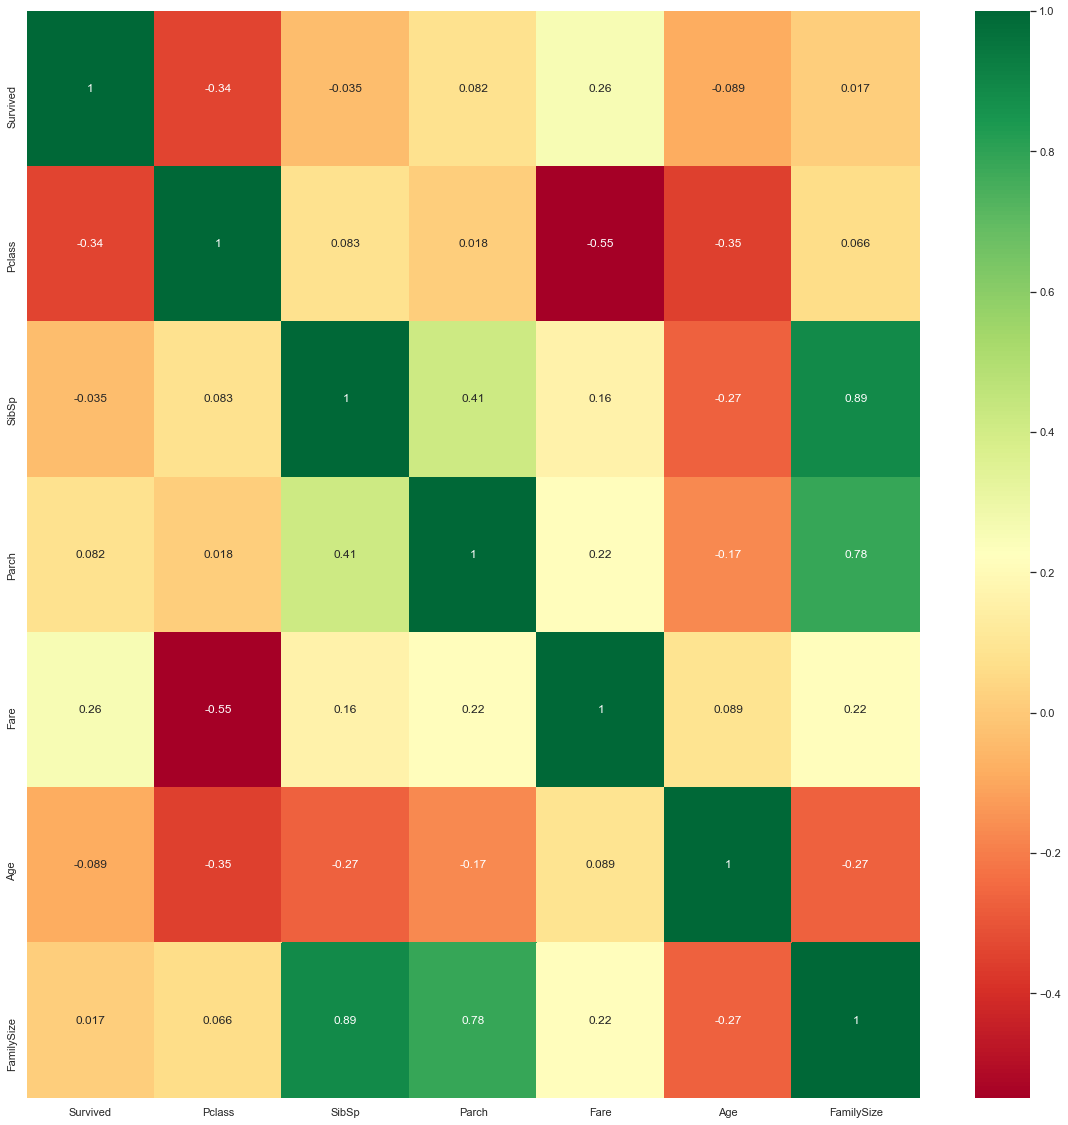

In [190]:
# Showing Correlation

corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")
fig = g.get_figure()

In [191]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,Age,FamilySize
0,0,3,male,1,0,7.2500,C,S,Mr,2.0,2
1,1,1,female,1,0,71.2833,C,C,Mrs,4.0,2
2,1,3,female,0,0,7.9250,C,S,Miss,3.0,1
3,1,1,female,1,0,53.1000,C,S,Mrs,3.0,2
4,0,3,male,0,0,8.0500,C,S,Mr,3.0,1


In [192]:
test.head()

,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,Age,FamilySize
0,3,male,0,0,7.8292,C,Q,Mr,3.0,1
1,3,female,1,0,7.0000,C,S,Mrs,4.0,2
2,2,male,0,0,9.6875,C,Q,Mr,5.0,1
3,3,male,0,0,8.6625,C,S,Mr,3.0,1
4,3,female,1,1,12.2875,C,S,Mrs,2.0,3


In [193]:
# Conversion of data to Non-Tree Based Algorithm

In [194]:
# Feature Preprocessing of Fare Data

In [195]:
# Case 1
train["Fare"] = (train["Fare"] - train["Fare"].min()) / (train["Fare"].max() - train["Fare"].min())
test["Fare"] = (test["Fare"] - test["Fare"].min()) / (test["Fare"].max() - test["Fare"].min())

In [142]:
# Case 2
train["Fare"] = (train["Fare"] - train["Fare"].mean()) / (train["Fare"].std())
test["Fare"] = (test["Fare"] - test["Fare"].mean()) / (test["Fare"].std())

In [143]:
# Case 3
train["Fare"] = np.log(1 + train["Fare"])
test["Fare"] = np.log(1 + test["Fare"])

In [144]:
# Case 4
train["Fare"] = np.sqrt((2/3) + train["Fare"])
test["Fare"] = np.sqrt((2/3) + test["Fare"])

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [196]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,Age,FamilySize
0,0,3,male,1,0,0.014151,C,S,Mr,2.0,2
1,1,1,female,1,0,0.139136,C,C,Mrs,4.0,2
2,1,3,female,0,0,0.015469,C,S,Miss,3.0,1
3,1,1,female,1,0,0.103644,C,S,Mrs,3.0,2
4,0,3,male,0,0,0.015713,C,S,Mr,3.0,1


In [197]:
test.head()

,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,Age,FamilySize
0,3,male,0,0,0.015282,C,Q,Mr,3.0,1
1,3,female,1,0,0.013663,C,S,Mrs,4.0,2
2,2,male,0,0,0.018909,C,Q,Mr,5.0,1
3,3,male,0,0,0.016908,C,S,Mr,3.0,1
4,3,female,1,1,0.023984,C,S,Mrs,2.0,3


In [198]:
# Frequency Encoding for Categorical Features

In [199]:
# Sex

In [200]:
encoding = train.groupby("Sex").size()
encoding = encoding / len(train)
train["Sex"] = train["Sex"].map(encoding)

encoding = test.groupby("Sex").size()
encoding = encoding / len(test)
test["Sex"] = test["Sex"].map(encoding)

In [201]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,Age,FamilySize
0,0,3,0.647587,1,0,0.014151,C,S,Mr,2.0,2
1,1,1,0.352413,1,0,0.139136,C,C,Mrs,4.0,2
2,1,3,0.352413,0,0,0.015469,C,S,Miss,3.0,1
3,1,1,0.352413,1,0,0.103644,C,S,Mrs,3.0,2
4,0,3,0.647587,0,0,0.015713,C,S,Mr,3.0,1


In [202]:
test.head()

,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,Age,FamilySize
0,3,0.636364,0,0,0.015282,C,Q,Mr,3.0,1
1,3,0.363636,1,0,0.013663,C,S,Mrs,4.0,2
2,2,0.636364,0,0,0.018909,C,Q,Mr,5.0,1
3,3,0.636364,0,0,0.016908,C,S,Mr,3.0,1
4,3,0.363636,1,1,0.023984,C,S,Mrs,2.0,3


In [203]:
# Cabin

In [204]:
encoding = train.groupby("Cabin").size()
encoding = encoding / len(train)
train["Cabin"] = train["Cabin"].map(encoding)

encoding = test.groupby("Cabin").size()
encoding = encoding / len(test)
test["Cabin"] = test["Cabin"].map(encoding)

In [205]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,Age,FamilySize
0,0,3,0.647587,1,0,0.014151,0.837262,S,Mr,2.0,2
1,1,1,0.352413,1,0,0.139136,0.837262,C,Mrs,4.0,2
2,1,3,0.352413,0,0,0.015469,0.837262,S,Miss,3.0,1
3,1,1,0.352413,1,0,0.103644,0.837262,S,Mrs,3.0,2
4,0,3,0.647587,0,0,0.015713,0.837262,S,Mr,3.0,1


In [206]:
test.head()

,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,Age,FamilySize
0,3,0.636364,0,0,0.015282,0.866029,Q,Mr,3.0,1
1,3,0.363636,1,0,0.013663,0.866029,S,Mrs,4.0,2
2,2,0.636364,0,0,0.018909,0.866029,Q,Mr,5.0,1
3,3,0.636364,0,0,0.016908,0.866029,S,Mr,3.0,1
4,3,0.363636,1,1,0.023984,0.866029,S,Mrs,2.0,3


In [207]:
# Embarked

In [208]:
encoding = train.groupby("Embarked").size()
encoding = encoding / len(train)
train["Embarked"] = train["Embarked"].map(encoding)

encoding = test.groupby("Embarked").size()
encoding = encoding / len(test)
test["Embarked"] = test["Embarked"].map(encoding)

In [209]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,Age,FamilySize
0,0,3,0.647587,1,0,0.014151,0.837262,0.725028,Mr,2.0,2
1,1,1,0.352413,1,0,0.139136,0.837262,0.188552,Mrs,4.0,2
2,1,3,0.352413,0,0,0.015469,0.837262,0.725028,Miss,3.0,1
3,1,1,0.352413,1,0,0.103644,0.837262,0.725028,Mrs,3.0,2
4,0,3,0.647587,0,0,0.015713,0.837262,0.725028,Mr,3.0,1


In [210]:
test.head()

,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,Age,FamilySize
0,3,0.636364,0,0,0.015282,0.866029,0.110048,Mr,3.0,1
1,3,0.363636,1,0,0.013663,0.866029,0.645933,Mrs,4.0,2
2,2,0.636364,0,0,0.018909,0.866029,0.110048,Mr,5.0,1
3,3,0.636364,0,0,0.016908,0.866029,0.645933,Mr,3.0,1
4,3,0.363636,1,1,0.023984,0.866029,0.645933,Mrs,2.0,3


In [211]:
# SibSp

In [212]:
encoding = train.groupby("SibSp").size()
encoding = encoding / len(train)
train["SibSp"] = train["SibSp"].map(encoding)

encoding = test.groupby("SibSp").size()
encoding = encoding / len(test)
test["SibSp"] = test["SibSp"].map(encoding)

In [213]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,Age,FamilySize
0,0,3,0.647587,0.234568,0,0.014151,0.837262,0.725028,Mr,2.0,2
1,1,1,0.352413,0.234568,0,0.139136,0.837262,0.188552,Mrs,4.0,2
2,1,3,0.352413,0.682379,0,0.015469,0.837262,0.725028,Miss,3.0,1
3,1,1,0.352413,0.234568,0,0.103644,0.837262,0.725028,Mrs,3.0,2
4,0,3,0.647587,0.682379,0,0.015713,0.837262,0.725028,Mr,3.0,1


In [214]:
test.head()

,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,Age,FamilySize
0,3,0.636364,0.677033,0,0.015282,0.866029,0.110048,Mr,3.0,1
1,3,0.363636,0.263158,0,0.013663,0.866029,0.645933,Mrs,4.0,2
2,2,0.636364,0.677033,0,0.018909,0.866029,0.110048,Mr,5.0,1
3,3,0.636364,0.677033,0,0.016908,0.866029,0.645933,Mr,3.0,1
4,3,0.363636,0.263158,1,0.023984,0.866029,0.645933,Mrs,2.0,3


In [215]:
# Parch

In [216]:
encoding = train.groupby("Parch").size()
encoding = encoding / len(train)
train["Parch"] = train["Parch"].map(encoding)

encoding = test.groupby("Parch").size()
encoding = encoding / len(test)
test["Parch"] = test["Parch"].map(encoding)

In [217]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,Age,FamilySize
0,0,3,0.647587,0.234568,0.760943,0.014151,0.837262,0.725028,Mr,2.0,2
1,1,1,0.352413,0.234568,0.760943,0.139136,0.837262,0.188552,Mrs,4.0,2
2,1,3,0.352413,0.682379,0.760943,0.015469,0.837262,0.725028,Miss,3.0,1
3,1,1,0.352413,0.234568,0.760943,0.103644,0.837262,0.725028,Mrs,3.0,2
4,0,3,0.647587,0.682379,0.760943,0.015713,0.837262,0.725028,Mr,3.0,1


In [218]:
test.head()

,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,Age,FamilySize
0,3,0.636364,0.677033,0.775120,0.015282,0.866029,0.110048,Mr,3.0,1
1,3,0.363636,0.263158,0.775120,0.013663,0.866029,0.645933,Mrs,4.0,2
2,2,0.636364,0.677033,0.775120,0.018909,0.866029,0.110048,Mr,5.0,1
3,3,0.636364,0.677033,0.775120,0.016908,0.866029,0.645933,Mr,3.0,1
4,3,0.363636,0.263158,0.124402,0.023984,0.866029,0.645933,Mrs,2.0,3


In [219]:
# FamilySize

In [220]:
encoding = train.groupby("FamilySize").size()
encoding = encoding / len(train)
train["FamilySize"] = train["FamilySize"].map(encoding)

encoding = test.groupby("FamilySize").size()
encoding = encoding / len(test)
test["FamilySize"] = test["FamilySize"].map(encoding)

In [221]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,Age,FamilySize
0,0,3,0.647587,0.234568,0.760943,0.014151,0.837262,0.725028,Mr,2.0,0.180696
1,1,1,0.352413,0.234568,0.760943,0.139136,0.837262,0.188552,Mrs,4.0,0.180696
2,1,3,0.352413,0.682379,0.760943,0.015469,0.837262,0.725028,Miss,3.0,0.602694
3,1,1,0.352413,0.234568,0.760943,0.103644,0.837262,0.725028,Mrs,3.0,0.180696
4,0,3,0.647587,0.682379,0.760943,0.015713,0.837262,0.725028,Mr,3.0,0.602694


In [222]:
test.head()

,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,Age,FamilySize
0,3,0.636364,0.677033,0.775120,0.015282,0.866029,0.110048,Mr,3.0,0.605263
1,3,0.363636,0.263158,0.775120,0.013663,0.866029,0.645933,Mrs,4.0,0.177033
2,2,0.636364,0.677033,0.775120,0.018909,0.866029,0.110048,Mr,5.0,0.605263
3,3,0.636364,0.677033,0.775120,0.016908,0.866029,0.645933,Mr,3.0,0.605263
4,3,0.363636,0.263158,0.124402,0.023984,0.866029,0.645933,Mrs,2.0,0.136364


In [223]:
# One Hot Encoding for Ordinal Features

In [224]:
# PClass Dummy Creation

Pclass_train = pd.get_dummies(train["Pclass"])
Pclass_test = pd.get_dummies(test["Pclass"])

Pclass_train.rename(columns={1:"Pclass_1" , 2:"Pclass_2" , 3:"Pclass_3"} , inplace=True)
Pclass_test.rename(columns={1:"Pclass_1" , 2:"Pclass_2" , 3:"Pclass_3"} , inplace=True)

train = pd.concat([train , Pclass_train] , axis=1)
test = pd.concat([test , Pclass_test] , axis=1)

train.drop(["Pclass"] , inplace=True , axis=1)
test.drop(["Pclass"] , inplace=True , axis=1)

In [225]:
train.head()

,Survived,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,Age,FamilySize,Pclass_1,Pclass_2,Pclass_3
0,0,0.647587,0.234568,0.760943,0.014151,0.837262,0.725028,Mr,2.0,0.180696,0,0,1
1,1,0.352413,0.234568,0.760943,0.139136,0.837262,0.188552,Mrs,4.0,0.180696,1,0,0
2,1,0.352413,0.682379,0.760943,0.015469,0.837262,0.725028,Miss,3.0,0.602694,0,0,1
3,1,0.352413,0.234568,0.760943,0.103644,0.837262,0.725028,Mrs,3.0,0.180696,1,0,0
4,0,0.647587,0.682379,0.760943,0.015713,0.837262,0.725028,Mr,3.0,0.602694,0,0,1


In [226]:
test.head()

,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,Age,FamilySize,Pclass_1,Pclass_2,Pclass_3
0,0.636364,0.677033,0.775120,0.015282,0.866029,0.110048,Mr,3.0,0.605263,0,0,1
1,0.363636,0.263158,0.775120,0.013663,0.866029,0.645933,Mrs,4.0,0.177033,0,0,1
2,0.636364,0.677033,0.775120,0.018909,0.866029,0.110048,Mr,5.0,0.605263,0,1,0
3,0.636364,0.677033,0.775120,0.016908,0.866029,0.645933,Mr,3.0,0.605263,0,0,1
4,0.363636,0.263158,0.124402,0.023984,0.866029,0.645933,Mrs,2.0,0.136364,0,0,1


In [227]:
# Age Dummy Creation

Age_train = pd.get_dummies(train["Age"])
Age_test = pd.get_dummies(test["Age"])

Age_train.rename(columns={1.0:"Age_1" , 2.0:"Age_2" , 3.0:"Age_3" , 4.0:"Age_4" , 5.0:"Age_5"} , inplace=True)
Age_test.rename(columns={1.0:"Age_1" , 2.0:"Age_2" , 3.0:"Age_3" , 4.0:"Age_4" , 5.0:"Age_5"} , inplace=True)

train = pd.concat([train , Age_train] , axis=1)
test = pd.concat([test , Age_test] , axis=1)

train.drop(["Age"] , inplace=True , axis=1)
test.drop(["Age"] , inplace=True , axis=1)

In [228]:
train.head()

,Survived,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,Pclass_1,Pclass_2,Pclass_3,Age_1,Age_2,Age_3,Age_4,Age_5
0,0,0.647587,0.234568,0.760943,0.014151,0.837262,0.725028,Mr,0.180696,0,0,1,0,1,0,0,0
1,1,0.352413,0.234568,0.760943,0.139136,0.837262,0.188552,Mrs,0.180696,1,0,0,0,0,0,1,0
2,1,0.352413,0.682379,0.760943,0.015469,0.837262,0.725028,Miss,0.602694,0,0,1,0,0,1,0,0
3,1,0.352413,0.234568,0.760943,0.103644,0.837262,0.725028,Mrs,0.180696,1,0,0,0,0,1,0,0
4,0,0.647587,0.682379,0.760943,0.015713,0.837262,0.725028,Mr,0.602694,0,0,1,0,0,1,0,0


In [229]:
test.head()

,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,Pclass_1,Pclass_2,Pclass_3,Age_1,Age_2,Age_3,Age_4,Age_5
0,0.636364,0.677033,0.775120,0.015282,0.866029,0.110048,Mr,0.605263,0,0,1,0,0,1,0,0
1,0.363636,0.263158,0.775120,0.013663,0.866029,0.645933,Mrs,0.177033,0,0,1,0,0,0,1,0
2,0.636364,0.677033,0.775120,0.018909,0.866029,0.110048,Mr,0.605263,0,1,0,0,0,0,0,1
3,0.636364,0.677033,0.775120,0.016908,0.866029,0.645933,Mr,0.605263,0,0,1,0,0,1,0,0
4,0.363636,0.263158,0.124402,0.023984,0.866029,0.645933,Mrs,0.136364,0,0,1,0,1,0,0,0


In [230]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, 
                 "Master": 4, "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"Countess": 4,
                 "Ms": 4, "Lady": 4, "Jonkheer": 4, "Don": 4, "Dona" : 4, "Mme": 4,"Capt": 4,"Sir": 4 }
train['Title'] = train['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping)

In [231]:
train.head()

,Survived,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,Pclass_1,Pclass_2,Pclass_3,Age_1,Age_2,Age_3,Age_4,Age_5
0,0,0.647587,0.234568,0.760943,0.014151,0.837262,0.725028,1,0.180696,0,0,1,0,1,0,0,0
1,1,0.352413,0.234568,0.760943,0.139136,0.837262,0.188552,3,0.180696,1,0,0,0,0,0,1,0
2,1,0.352413,0.682379,0.760943,0.015469,0.837262,0.725028,2,0.602694,0,0,1,0,0,1,0,0
3,1,0.352413,0.234568,0.760943,0.103644,0.837262,0.725028,3,0.180696,1,0,0,0,0,1,0,0
4,0,0.647587,0.682379,0.760943,0.015713,0.837262,0.725028,1,0.602694,0,0,1,0,0,1,0,0


In [232]:
test.head()

,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,Pclass_1,Pclass_2,Pclass_3,Age_1,Age_2,Age_3,Age_4,Age_5
0,0.636364,0.677033,0.775120,0.015282,0.866029,0.110048,1,0.605263,0,0,1,0,0,1,0,0
1,0.363636,0.263158,0.775120,0.013663,0.866029,0.645933,3,0.177033,0,0,1,0,0,0,1,0
2,0.636364,0.677033,0.775120,0.018909,0.866029,0.110048,1,0.605263,0,1,0,0,0,0,0,1
3,0.636364,0.677033,0.775120,0.016908,0.866029,0.645933,1,0.605263,0,0,1,0,0,1,0,0
4,0.363636,0.263158,0.124402,0.023984,0.866029,0.645933,3,0.136364,0,0,1,0,1,0,0,0


In [233]:
# Title Dummy Creation

Title_train = pd.get_dummies(train["Title"])
Title_test = pd.get_dummies(test["Title"])

Title_train.rename(columns={1.0:"Title_1" , 2.0:"Title_2" , 3.0:"Title_3" , 4.0:"Title_4"} , inplace=True)
Title_test.rename(columns={1.0:"Title_1" , 2.0:"Title_2" , 3.0:"Title_3" , 4.0:"Title_4"} , inplace=True)

train = pd.concat([train , Title_train] , axis=1)
test = pd.concat([test , Title_test] , axis=1)

train.drop(["Title"] , inplace=True , axis=1)
test.drop(["Title"] , inplace=True , axis=1)

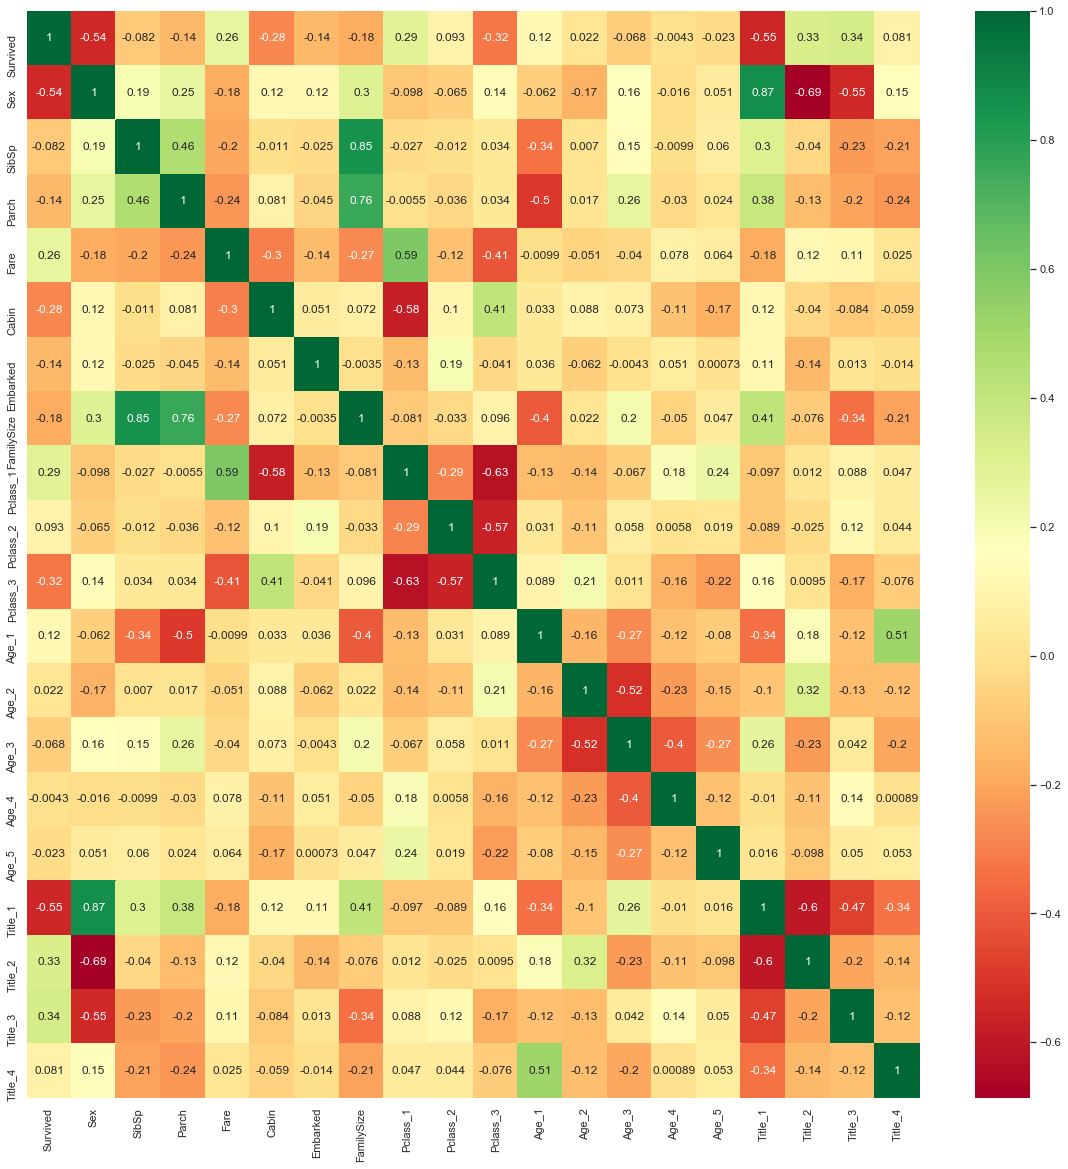

In [234]:
# Showing Correlation

corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")
fig = g.get_figure()

In [235]:
train.head()

,Survived,Sex,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,Pclass_1,Pclass_2,Pclass_3,Age_1,Age_2,Age_3,Age_4,Age_5,Title_1,Title_2,Title_3,Title_4
0,0,0.647587,0.234568,0.760943,0.014151,0.837262,0.725028,0.180696,0,0,1,0,1,0,0,0,1,0,0,0
1,1,0.352413,0.234568,0.760943,0.139136,0.837262,0.188552,0.180696,1,0,0,0,0,0,1,0,0,0,1,0
2,1,0.352413,0.682379,0.760943,0.015469,0.837262,0.725028,0.602694,0,0,1,0,0,1,0,0,0,1,0,0
3,1,0.352413,0.234568,0.760943,0.103644,0.837262,0.725028,0.180696,1,0,0,0,0,1,0,0,0,0,1,0
4,0,0.647587,0.682379,0.760943,0.015713,0.837262,0.725028,0.602694,0,0,1,0,0,1,0,0,1,0,0,0


In [236]:
test.head()

,Sex,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,Pclass_1,Pclass_2,Pclass_3,Age_1,Age_2,Age_3,Age_4,Age_5,Title_1,Title_2,Title_3,Title_4
0,0.636364,0.677033,0.775120,0.015282,0.866029,0.110048,0.605263,0,0,1,0,0,1,0,0,1,0,0,0
1,0.363636,0.263158,0.775120,0.013663,0.866029,0.645933,0.177033,0,0,1,0,0,0,1,0,0,0,1,0
2,0.636364,0.677033,0.775120,0.018909,0.866029,0.110048,0.605263,0,1,0,0,0,0,0,1,1,0,0,0
3,0.636364,0.677033,0.775120,0.016908,0.866029,0.645933,0.605263,0,0,1,0,0,1,0,0,1,0,0,0
4,0.363636,0.263158,0.124402,0.023984,0.866029,0.645933,0.136364,0,0,1,0,1,0,0,0,0,0,1,0


In [237]:
# Saving clean train data for non-tree based clasifier
train.to_csv (r"C:\Users\admin\Desktop\Datasets\Titanic_Kaggle\train_nt_clean.csv", index = False, header=True)

# Saving clean test data for non-tree based clasifier
test.to_csv (r"C:\Users\admin\Desktop\Datasets\Titanic_Kaggle\test_nt_clean.csv", index = False, header=True)